# Computer Vision - Special Topics

This notebook contains exercises for the Computer Vision Special Topics material.

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, InputLayer, MaxPooling2D, GlobalAveragePooling2D, Softmax, Dense, Flatten, Dropout
import matplotlib.pyplot as plt

### Exercise 1 - Transfer Learning

**Summary:**
In this exercise we will use transfer learning using a neural networks outputs as features for a SVM.

**Data**:
We will use a subset of the cifar100 dataset (I call it cifar20). You are provided with a pre-trained model on the cifar80 (the other categories in cifar100) that reaches a test
accuracy of approximately 63% on the cifar80 dataset. Execute the cells below to prepare the dataset and load the pretrained model (```pretrained_model```). Notice that the pretrained model was trained
for a 80-class problem.  

**Your Tasks in this exercise:**

1. Use transfer learning to train a SVM classifier using the features extracted by the pretrained model
    * Extract features using a suitable layer in the pretrained model. Notice you might want to use the ```tf.keras.Model(inputs=, outputs=)``` class to access the outputs of each layer easily.
    * Train a SVM classifier (use sklearn) on the features extracted using the training data (```X_train_cifar20```)
    * Evaluate the performance of your classifier on the features extracted using the test data (```X_test_cifar20```)
    * Discuss your results.



In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar100.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

cifar20_labels = np.array([60, 72, 65, 97, 18, 47, 58, 51, 84,  2, 90,  6, 38, 35, 70, 89, 24, 86, 36, 32])
cifar20_label_mapping = {60 : 0, 72: 1, 65 : 2, 97 : 3, 18 : 4, 47 : 5, 58 : 6, 51 : 7, 84 : 8,  2 : 9, 90 : 10,
                          6 : 11, 38 : 12, 35 :13, 70 : 14, 89 : 15, 24 : 16, 86 : 17, 36: 18, 32 : 19}

X_train_cifar20 = X_train[np.isin(Y_train, cifar20_labels).ravel(),:,:]
Y_train_cifar20 = Y_train[np.isin(Y_train, cifar20_labels).ravel()]

X_test_cifar20 = X_test[np.isin(Y_test, cifar20_labels).ravel(),:,:]
Y_test_cifar20 = Y_test[np.isin(Y_test, cifar20_labels).ravel()]


Y_train_cifar20_remapped = []
for y in Y_train_cifar20.ravel():
    y_mapped = cifar20_label_mapping[y]
    Y_train_cifar20_remapped.append(y_mapped)
Y_train_cifar20 = np.array(Y_train_cifar20_remapped)

Y_test_cifar20_remapped = []
for y in Y_test_cifar20.ravel():
    y_mapped = cifar20_label_mapping[y]
    Y_test_cifar20_remapped.append(y_mapped)
Y_test_cifar20 = np.array(Y_test_cifar20_remapped)


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [3]:
!python -m wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/cifar80_resnet_best.h5 -o cifar80_resnet_best.h5


Saved under cifar80_resnet_best.h5


In [5]:
pretrained = tf.keras.models.load_model('./cifar80_resnet_best.h5')

### Exercise 2 - Fine Tuning

**Summary:**
In this exercise we will use fine tuning to adapt a neural network to a new dataset.

**Data**:
We will use a subset of the cifar100 dataset (I call it cifar20). You are provided with a pre-trained model on the cifar80 (the other categories in cifar100) that reaches a test
accuracy of approximately 63% on the cifar80 dataset. Execute the cells below to prepare the dataset and load the pretrained model (```pretrained_model```). Notice that the pretrained model was trained
for a 80-class problem.  

**Your Tasks in this exercise:**

1. Fine tune the pre-trained model.
    * Create a new model using the functional keras API that uses the pretrained model in a 20-class classification problem. Notice you will need to ignore/remove the final layer and replace it with a suitable layer.
    * Train your fine-tuning model:
        * Freeze all layers borrowed from the pre-trained model and and fine tune the model
        * Fine-tune all layers of the new model
        * Compare both models.
    * Plot and discuss your results.



In [ ]:
!python -m wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/cifar80_resnet_best.h5 -o cifar80_resnet_best.h5

In [7]:
pretrained_model = tf.keras.models.load_model('./cifar80_resnet_best.h5')

import tensorflow as tf
import numpy as np

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar100.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

cifar20_labels = np.array([60, 72, 65, 97, 18, 47, 58, 51, 84,  2, 90,  6, 38, 35, 70, 89, 24, 86, 36, 32])
cifar20_label_mapping = {60 : 0, 72: 1, 65 : 2, 97 : 3, 18 : 4, 47 : 5, 58 : 6, 51 : 7, 84 : 8,  2 : 9, 90 : 10,
                          6 : 11, 38 : 12, 35 :13, 70 : 14, 89 : 15, 24 : 16, 86 : 17, 36: 18, 32 : 19}

X_train_cifar20 = X_train[np.isin(Y_train, cifar20_labels).ravel(),:,:]
Y_train_cifar20 = Y_train[np.isin(Y_train, cifar20_labels).ravel()]

X_test_cifar20 = X_test[np.isin(Y_test, cifar20_labels).ravel(),:,:]
Y_test_cifar20 = Y_test[np.isin(Y_test, cifar20_labels).ravel()]

Y_train_cifar20_remapped = []
for y in Y_train_cifar20.ravel():
    y_mapped = cifar20_label_mapping[y]
    Y_train_cifar20_remapped.append(y_mapped)
Y_train_cifar20 = np.array(Y_train_cifar20_remapped)

Y_test_cifar20_remapped = []
for y in Y_test_cifar20.ravel():
    y_mapped = cifar20_label_mapping[y]
    Y_test_cifar20_remapped.append(y_mapped)
Y_test_cifar20 = np.array(Y_test_cifar20_remapped)

Y_train_cifar_20_one_hot = tf.keras.utils.to_categorical(Y_train_cifar20_remapped)
Y_test_cifar_20_one_hot = tf.keras.utils.to_categorical(Y_test_cifar20_remapped)


### Exercise 3 - Regularization Techniques

**Summary:**
In this exercise we study different regularization techniques used to train neural networks.

**Data**:
In this exercise we will use the cifar10 dataset. I have provided you with a cell to load and preprocess the dataset below. I also provided you with a very simple base-CNN
(```cnn_base```).

**Your Tasks in this exercise:**

1. Train and evaluate the base-CNN
    * Train the base-CNN on the training portion of the dataset
    * Make sure that the test part of the data is used after each epoch to predict the test accuracy
    * Record the history of your training (```hist = cnn_base.fit(...)```) and plot your results after training is finished. You can access the training accuracy values
    via ```hist.history['acc']``` and the test accuracy values via ```hist.history['val_acc']```.
    * Explain the results.

2. Train and evaluate the base-CNN using L1-Regularization
    * Create a new cell and copy the base-CNN. Add a kernel regularizer and bias regularizer using L1-Regularization (where does it make sense?)
    * Train the L1-CNN, plot the results and compare the results to the base-CNN.
    * Explain the results.

3. Train and evaluate the base-CNN using L2-Regularization
    * Create a new cell and copy the base-CNN. Add a kernel regularizer and bias regularizer using L2-Regularization (where does it make sense?)
    * Train the L2-CNN, plot the results and compare the results to the base-CNN.
    * Explain the results.

4. Train and evaluate the base-CNN using Dropout
    * Create a new cell and copy the base-CNN. Add Dropout layers (where does it make sense?)
    * Train the Dropout-CNN, plot the results and compare the results to the base-CNN.
    * Explain the results.

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

y_test = tf.keras.utils.to_categorical(y_test, 10)
y_train = tf.keras.utils.to_categorical(y_train, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [15]:
# Use this simple CNN as your basis for adding regularization.
#
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, InputLayer, MaxPooling2D, GlobalAveragePooling2D, Softmax, Dense, Flatten, Dropout

cnn_base = tf.keras.Sequential()
cnn_base.add(InputLayer(input_shape=(32,32,3)))
cnn_base.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_base.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_base.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_base.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_base.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_base.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_base.add(Flatten())
cnn_base.add(Dense(256, activation='relu'))
cnn_base.add(Dense(10, activation='softmax'))

C:\Users\cengi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [18]:
cnn_base.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

history = cnn_base.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.8591 - loss: 0.3989 - val_accuracy: 0.6735 - val_loss: 1.1960
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.8943 - loss: 0.3019 - val_accuracy: 0.6628 - val_loss: 1.2947
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.9222 - loss: 0.2242 - val_accuracy: 0.6631 - val_loss: 1.4807
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.9385 - loss: 0.1773 - val_accuracy: 0.6611 - val_loss: 1.7364
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.9466 - loss: 0.1546 - val_accuracy: 0.6556 - val_loss: 1.8904
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.9496 - loss: 0.1490 - val_accuracy: 0.6508 - val_loss: 2.0623
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.9626 - loss: 0.1105 - val_accuracy: 0.6319 - val_loss: 2.3142
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.9648 -

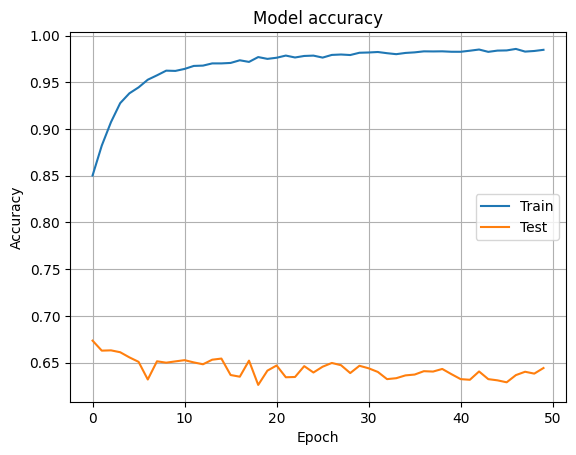

In [23]:
history.history['accuracy'], history.history['val_accuracy']


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center right')
plt.grid()

In [25]:
# Use this simple CNN as your basis for adding regularization.
#
cnn_l1 = tf.keras.Sequential()
cnn_l1.add(InputLayer(input_shape=(32,32,3)))
cnn_l1.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_l1.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_l1.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_l1.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_l1.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
cnn_l1.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
cnn_l1.add(Flatten())
cnn_l1.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01), bias_regularizer=tf.keras.regularizers.l1(0.01)))
cnn_l1.add(Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l1(0.01), bias_regularizer=tf.keras.regularizers.l1(0.01)))

C:\Users\cengi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [27]:
cnn_l1.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

history = cnn_l1.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.2758 - loss: 7.2379 - val_accuracy: 0.3015 - val_loss: 6.8881
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.3055 - loss: 6.5603 - val_accuracy: 0.3095 - val_loss: 6.4504
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.3065 - loss: 6.5317 - val_accuracy: 0.3058 - val_loss: 6.1652
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.3135 - loss: 6.5032 - val_accuracy: 0.3312 - val_loss: 5.7435
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.3222 - loss: 6.4800 - val_accuracy: 0.3040 - val_loss: 6.6381
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.3228 - loss: 6.4771 - val_accuracy: 0.3224 - val_loss: 7.3762
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.3333 - loss: 6.4822 - val_accuracy: 0.3316 - val_loss: 6.8688
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.3358 -

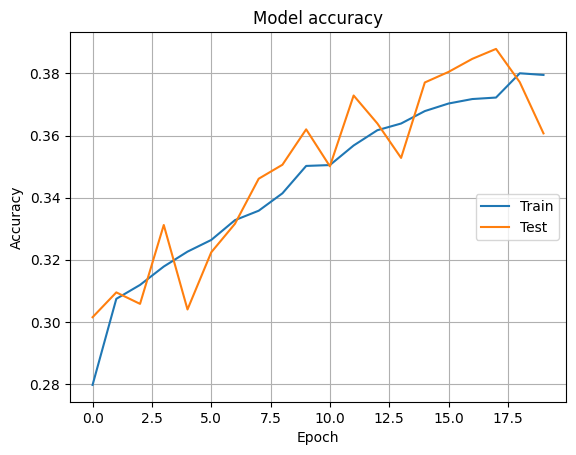

In [29]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center right')
plt.grid()

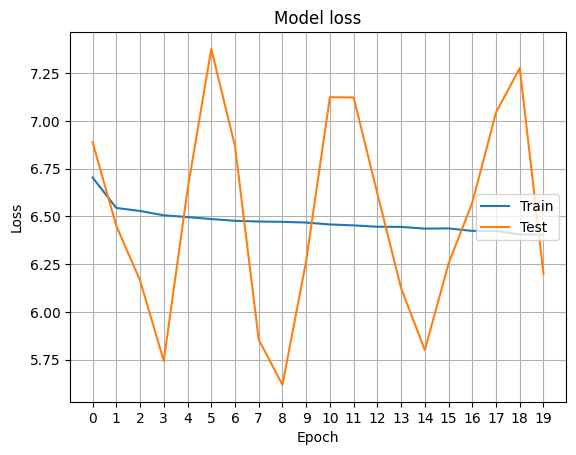

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(0, 20, 1))
plt.legend(['Train', 'Test'], loc='center right')
plt.grid()

### Exercise 4 - Residual Learning

**Summary:**
In this exercise we will create two neural networks that take an image with shape $(32,32,3)$ as input and provide us with the same image as output $(32,32,3)$. Consequently we try to learn a mapping $\mathcal{H}(x) := x$, which is known as the identity function. The identity function is a trivial function in mathematics but can be hard to learn using convolution operations.

**Data**:
In this exercise we will use the cifar100 dataset. I have provided you with a cell to load and preprocess the dataset below.

**Your Tasks in this exercise:**

1. ConvNet
    * Create a convolutional neural network (with 2 BatchNormalization and Conv2D layers, using only InputLayer, Conv2D and BatchNormalization as layers), which accepts images of shape $(32,32,3)$ and returns an image of shape $(32,32,3)$. Notice: You will have to use the functional keras API to do so (see slides).
    * Train your neural network (use only 2 epochs) with a suitable loss function.  
2. ResNet
    * Create a convolutional neural network using two identity blocks of a ResNet, which accepts images of shape $(32,32,3)$ and returns an image of shape $(32,32,3)$.
    * Train your neural network (using only 2 epochs) with a suitable loss function.
3. Analyze your Results
    * Use the ```evaluate()``` function of your keras model to predict the MSE of both trained nets.
    * Use some images from ```X_test``` and feed them into your models. Visualize the results.
    * Compare the results, explain the difference between the results, explain what happened.






In [ ]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar100.load_data(label_mode="fine")
X_train = X_train / 255.0
X_test = X_test / 255.0